In [15]:
#!pip install mxnet gluonts
#!pip install ujson

In [16]:
import xarray as xr
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from prophet import Prophet

In [17]:
df = pd.read_csv("history_map_temp2m_rate_to_2023-11-03T06_00_00.csv")

In [18]:
df.date = pd.to_datetime(df.date)
df.set_index("date",drop=True, inplace=True)

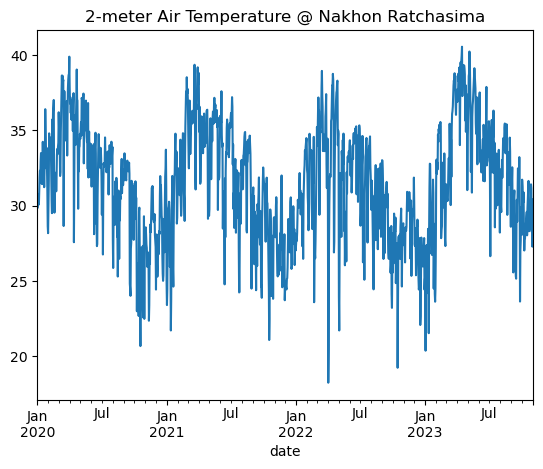

In [19]:
df['max'].plot(title='2-meter Air Temperature @ Nakhon Ratchasima')
plt.show()

In [20]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

In [21]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df['max'][: "2023-01-01T00:00:00.000000"]}],
    freq="D"
)

In [22]:
entry = next(iter(training_data))
train_series = to_pandas(entry)

In [38]:
training_df = pd.DataFrame({'ds': train_series.index, 'y': train_series.values})

In [39]:
training_df['ds'] = training_df['ds'].dt.to_timestamp()

In [47]:
# Test data
test_data = ListDataset(
    [{"start": df.index[0], "target": df['max'][:"2023-11-03T00:00:00.000000"]}],
    freq = "D"
)

In [51]:
entry = next(iter(test_data))
test_series = to_pandas(entry)

In [52]:
index_train_end = df.index.get_loc('2023-01-01')

In [53]:
m = Prophet()
m.fit(training_df)

11:58:42 - cmdstanpy - INFO - Chain [1] start processing
11:58:42 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future = m.make_future_dataframe(periods=300)
forecast = m.predict(future)

In [65]:
start_date = '2023-01-02'

# Extract rows based on the date range
forecast_only = forecast[(forecast['ds'] >= start_date)]

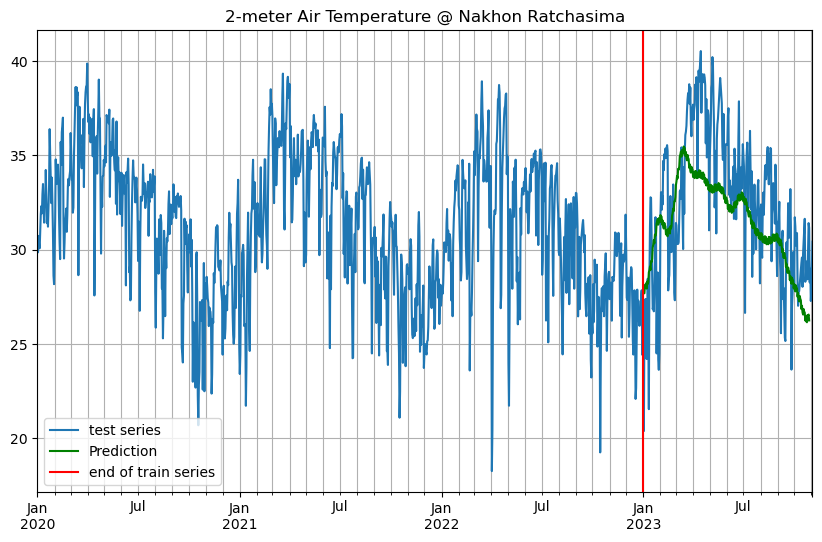

In [70]:
plt.figure(figsize=(10, 6))
test_series.plot(title='2-meter Air Temperature @ Nakhon Ratchasima')
plt.plot(forecast_only['ds'], forecast_only['yhat'], color='g')
plt.axvline(df.index[index_train_end], color='r') # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "Prediction", "end of train series"], loc="lower left")
plt.show()